## Setup environment

In [1]:
import matplotlib.pyplot as plt

from simulators.grid_world.grid_world import Maze, simulate_policy, set_granular_reward
from simulators.grid_world import HORIZON

grid_type = "simple"
# feature_type = "one_hot"

feature_type = "simularity"
dimensions = 100
sigma = 0.25

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

## Expert policy

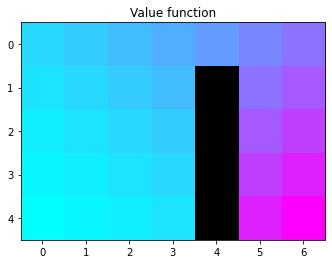

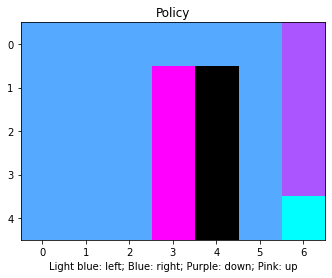

In [2]:
from algorithms.VI_dynamic_programming import value_iteration

expert_Q, expert_policy = value_iteration(env.P, env.R, env.gamma)

# Uncomment if you want to simulate the policy
# simulate_policy(expert_policy, f"../../videos/grid_world/{grid_type}_expert.mp4", env, HORIZON)

env.display_value_function(expert_Q)
env.display_policy(expert_Q)

In [3]:
env = set_granular_reward(env, expert_policy)

## Learninng from limited demonstation

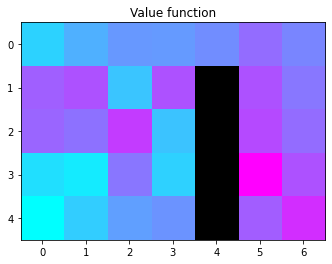

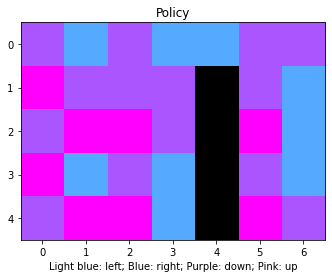

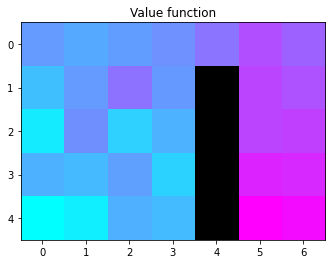

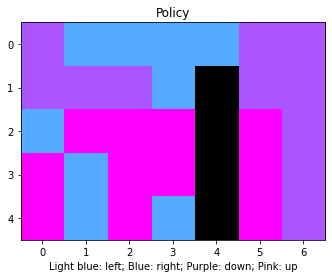

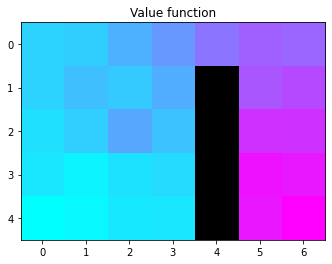

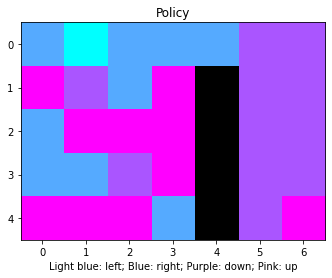

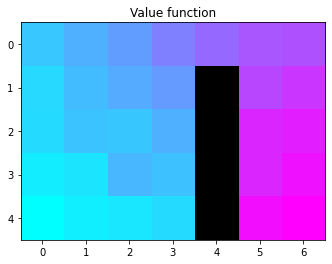

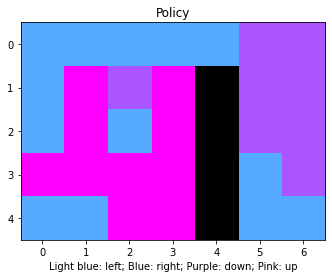

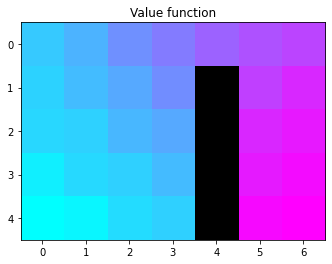

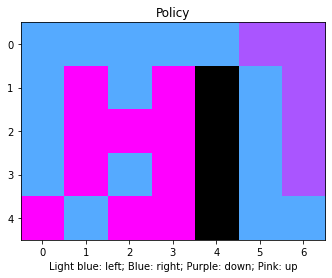

In [5]:
from algorithms.API.lstd import lstd_grid_word

n_expert_samples = 100
n_rl_samples = 500
regularisor = 0.00001
regularisor_bellmann = 0.00001
max_iteration = 5
epsilon_decay_limit = 0.2
regularisor_expert = 1
show_args = {"show_policy":True, "show_value_function": True, "show_statistics": False}

lstd_Q, lstd_policy, buffer_ = lstd_grid_word(env, n_expert_samples, n_rl_samples, regularisor, regularisor_bellmann, max_iteration=max_iteration, epsilon_decay_limit=epsilon_decay_limit, **show_args)

In [6]:
simulate_policy(lstd_policy, f"../../videos/grid_world/{grid_type}_lstd.mp4", env, HORIZON)

ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5233:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM default
ffmpeg version 4.3.3-0+deb11u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10 (Debian 10.2.1-6)
  configuration: --prefix=/usr --extra-version=0+deb11u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avres

## Deep Q-learning from Demonstration, tabular setting

End of expert phase


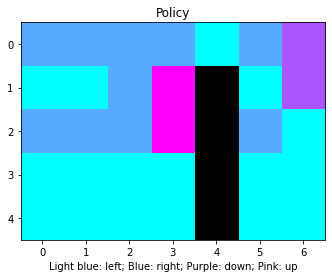

Beginning of rl phase


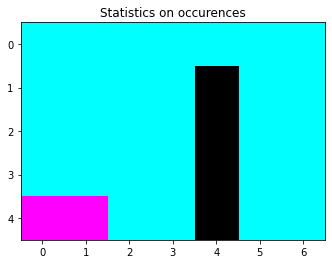

Max occurences 112.0


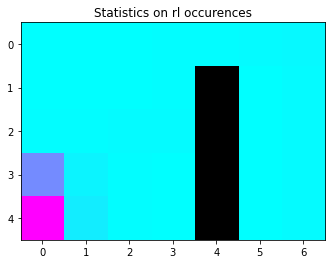

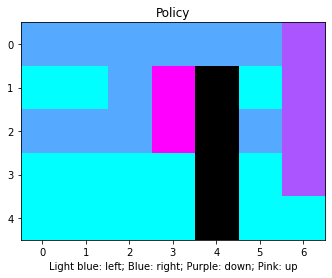

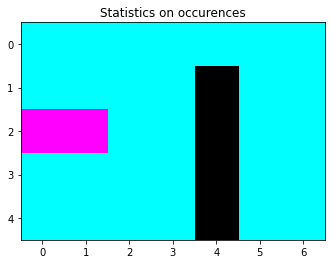

Max occurences 127.0


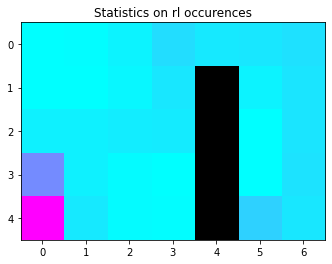

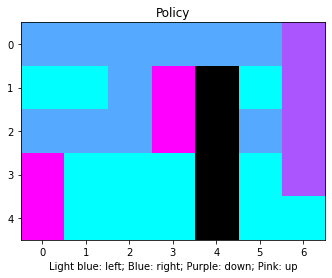

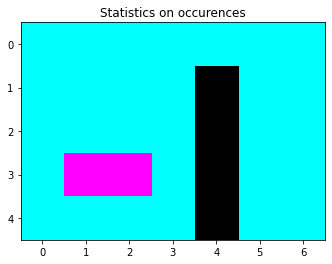

Max occurences 130.0


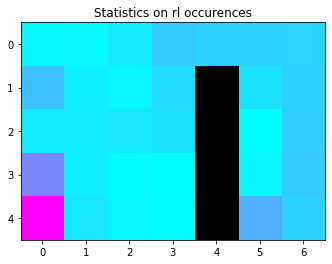

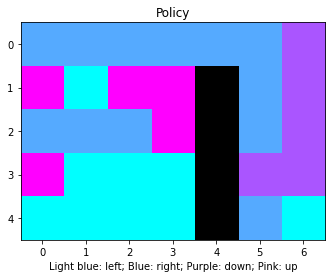

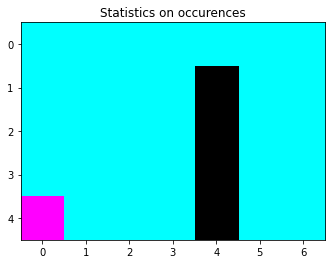

Max occurences 164.0


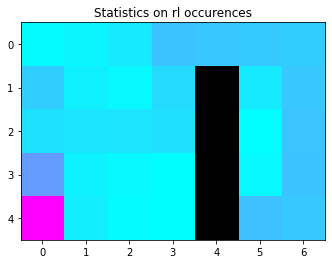

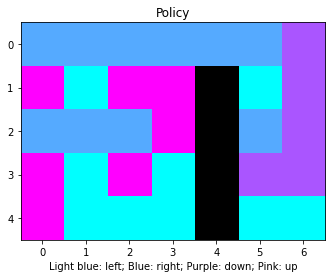

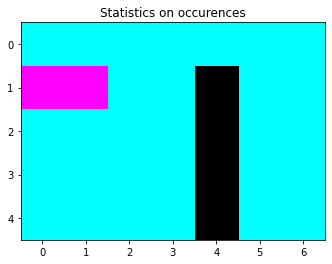

Max occurences 196.0


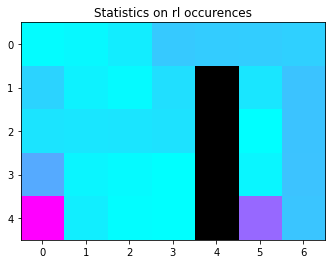

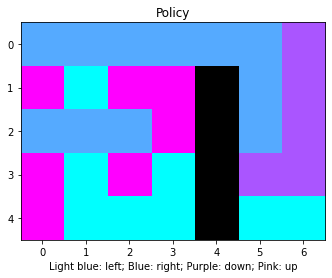

In [6]:
from algorithms.DQfD.tabular import tabular_DQfD

n_expert_trajectories = 8
n_step_td = 2
n_expert_iterations = 25
n_rl_iterations = 1000
epsilon_decay_limit = 0.2
update_target_frequency = 5
td_loss_weight = 1
n_td_loss_weight = 1
expert_weight = 1
diff_action_from_expert_penalisation = 0.8
show_args = {"show_policy":True, "show_value_function": False, "show_statistics": True, "display_frequency": 200}

DQfD_Q = tabular_DQfD(
    env,
    n_expert_trajectories,
    n_step_td,
    n_expert_iterations,
    n_rl_iterations,
    epsilon_decay_limit=epsilon_decay_limit,
    update_target_frequency=update_target_frequency,
    td_loss_weight=td_loss_weight,
    n_td_loss_weight=n_td_loss_weight,
    expert_weight=expert_weight,
    diff_action_from_expert_penalisation=diff_action_from_expert_penalisation,
    **show_args,
)